https://www.kaggle.com/vjgupta/titanic-simple-model-beginners
Following Instructions on Titanic Exercise

In [1]:


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer
%matplotlib inline



In [2]:
train_dataset_raw=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')


In [3]:
train_dataset = train_dataset_raw
print(train_dataset.isnull().sum())
print(test_dataset.isnull().sum())
train_dataset.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64

In [4]:
data_cleaner=[train_dataset, test_dataset]
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#create column 'CabinBool' which replaces the null value with 0 and who has a cabin with 1
for dataset in data_cleaner:
    dataset['Cabinbool']=dataset['Cabin'].notnull().astype('int')
    #discrete variables: create a family size with no. of members
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
    dataset['IsAlone']=1 #initialise to is alone =1
    dataset['IsAlone'].loc[dataset['FamilySize']>1]=0 #update to 0 if alone
    #store title of each person
    dataset['Title']=dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    #Fare Bins/Buckets using qcut or frequency bins. Type of scaling
    dataset['FareBin']=pd.qcut(dataset['Fare'],4)
    #Age buckets using cut or value bins. 6 age categories
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 6)
    

In [6]:

#Check training data (titles) and titles with less than 10 people into 'Misc' category
train_dataset.sample(10)

min_titles = 10
titles_under_10= train_dataset['Title'].value_counts() < min_titles
#using lambda function and df.apply function, make all titles that are marked as True become 'Misc'
train_dataset['Title']=train_dataset['Title'].apply(lambda x: 'Misc' if titles_under_10.loc[x] == True else x)
train_dataset['Title'].value_counts()

#apply to test dataset
titles_under_10_2= test_dataset['Title'].value_counts() < min_titles
test_dataset['Title'] = test_dataset['Title'].apply(lambda x: 'Misc' if titles_under_10_2.loc[x] == True else x)
test_dataset['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64

In [7]:
#code will create two column 'AgeBin_Code' and 'FareBin_Code' and 
#convert the bins( ex: AgeBin has {1-16},{16-24} ) to 
#numeric value and label them according to the bins.

label = LabelEncoder()
for dataset in data_cleaner:
    label.fit(dataset['AgeBin'])
    dataset['AgeBin_Code'] = label.transform(dataset['AgeBin'])
    label.fit(dataset['FareBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
print(train_dataset.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabinbool',
       'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin', 'AgeBin_Code',
       'FareBin_Code'],
      dtype='object')


Correlation between Features:

Generally, if the correlation between the two independent variables are high (>= 0.8) then we drop one independent variable otherwise it may lead to multi collinearity problem as both of them contains almost the same information.

Plus elimination of reduntant features (low correlation)

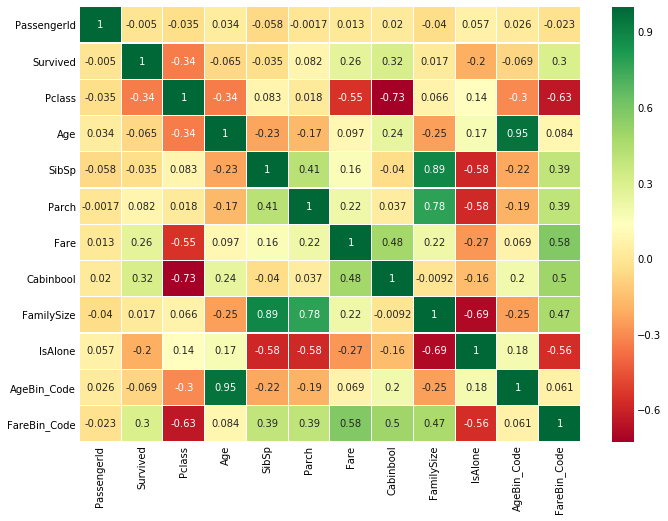

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabinbool,FamilySize,IsAlone,Title,FareBin,AgeBin,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0,Mr,"(-0.001, 7.91]","(13.333, 26.667]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0,Mrs,"(31.0, 512.329]","(26.667, 40.0]",2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,Miss,"(7.91, 14.454]","(13.333, 26.667]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0,Mrs,"(31.0, 512.329]","(26.667, 40.0]",2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,Mr,"(7.91, 14.454]","(26.667, 40.0]",2,1


In [8]:
#create heatmap
sns.heatmap(train_dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
#data.corr() --> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
train_dataset.head()

Remove PassengerID, PClass, Age, and a few others becuase of low correlation:

In [9]:
features_col=['Pclass','Sex','Embarked','IsAlone','Title','AgeBin_Code','FamilySize','FareBin_Code','Cabinbool']
train_ds = train_dataset[features_col] #subset dataset with desired columns list
test_ds = test_dataset[features_col]
train_label = train_dataset['Survived'] #create target column
print(train_ds.columns)
train_ds.head()

Index(['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Title', 'AgeBin_Code',
       'FamilySize', 'FareBin_Code', 'Cabinbool'],
      dtype='object')


,Pclass,Sex,Embarked,IsAlone,Title,AgeBin_Code,FamilySize,FareBin_Code,Cabinbool
0,3,male,S,0,Mr,1,2,0,0
1,1,female,C,0,Mrs,2,2,3,1
2,3,female,S,1,Miss,1,1,1,0
3,1,female,S,0,Mrs,2,2,3,1
4,3,male,S,1,Mr,2,1,1,0


Use .get_dummies to make binary feature (Sex) compatible

In [10]:
one_hot_encoded_training_predictors = pd.get_dummies(train_ds)
one_hot_encoded_testing_predictors = pd.get_dummies(test_ds)

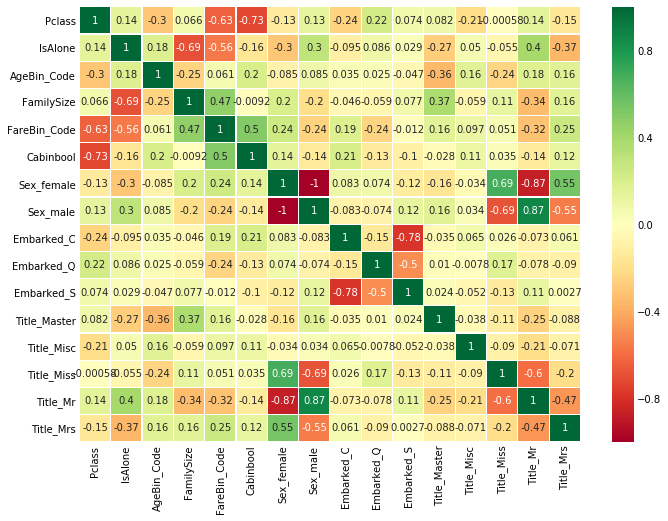

In [11]:
#Check correlation again
sns.heatmap(one_hot_encoded_training_predictors.corr(),annot=True, cmap='RdYlGn', linewidths = 0.2)
#data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [12]:
#Remove correlated features (sex=female/title=ms) to reduce redundancy
corln_col=['Title_Miss','Sex_male']
one_hot_encoded_training_predictors = one_hot_encoded_training_predictors.drop(corln_col,axis=1)
one_hot_encoded_testing_predictors = one_hot_encoded_testing_predictors.drop(corln_col,axis=1)

PREDICTIVE MODELING SECTION

Logistic Regression

Support Vector Machines(Linear and radial)

K-Nearest Neighbours

Naive Bayes

In [13]:
# Import all the required packages.
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import svm #support vector Machine
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


Cross Validation

After train/test split, I trial a few different models.
After this, I take the best four and use either Randomised Gridsearch (for SVM, due to long computing time of normal Gridsearch due to multiple hyperparameters, including kernel type) and Gridseach Cross Validationn.
    
1) Try a few different models
2) Compare and find one that seems to work well
3)Perform GridSearchCV to find best one

In [14]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(one_hot_encoded_training_predictors, train_label, test_size=0.20)

In [15]:
#Radial Support Vector Machines (rbf-SCVM) 
svc_clf = SVC(kernel='rbf', gamma = 0.1)
svc_clf.fit(train_X, train_y)
pred_svc = svc_clf.predict(test_X)
acc_svc = accuracy_score(test_y, pred_svc)
print(acc_svc)

0.8379888268156425


In [16]:
#Line Support Vector Machines
linsvc_clf = LinearSVC()
linsvc_clf.fit(train_X, train_y)
pred_linsvc=linsvc_clf.predict(test_X)
acc_linsvc = accuracy_score(test_y, pred_linsvc)
print(acc_linsvc)

0.8435754189944135


In [17]:
#Logistic Regression
logreg_clf = LogisticRegression()
logreg_clf.fit(train_X, train_y)
pred_logreg = logreg_clf.predict(test_X)
acc_logreg = accuracy_score(test_y, pred_logreg)

print(acc_logreg)

0.8491620111731844


In [18]:
#K-Nearest Neighbours
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)
pred_knn = knn_clf.predict(test_X)
acc_knn = accuracy_score(test_y, pred_knn)

print(acc_knn)

0.8268156424581006


In [19]:
#Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(train_X, train_y)
pred_gnb = gnb_clf.predict(test_X)
acc_gnb = accuracy_score(test_y, pred_gnb)

print(acc_gnb)


0.7932960893854749


In [20]:
#Compare all models' performances
model_performance = pd.DataFrame({
    'Model':['Radial SVM', 'Linear SVM', 'Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'],
    'Accuracy' : [acc_svc, acc_linsvc, acc_logreg, acc_knn, acc_gnb]
})
model_performance.sort_values(by='Accuracy', ascending = False)
print(model_performance)

                  Model  Accuracy
0            Radial SVM  0.837989
1            Linear SVM  0.843575
2   Logistic Regression  0.849162
3   K-Nearest Neighbors  0.826816
4  Gaussian Naive Bayes  0.793296


In [22]:

#Randomised GridSearch with every kernel type of SVM
from sklearn.model_selection import RandomizedSearchCV

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'kernel': kernels, 'C':Cs, 'gamma': gammas}
grid_search = RandomizedSearchCV(SVC(), param_grid, random_state = 1, n_iter = 20, cv=5)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best kernel: {}, best C value: {}, best gamma value: {}, best score: {}".format(best_params.get('kernel'), best_params.get('C'), best_params.get('gamma'), best_score))

Best kernel: rbf, best C value: 1, best gamma value: 0.1, best score: 0.8314606741573034


In [26]:
#Logistic Regression grid search
from sklearn.model_selection import GridSearchCV
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty' : ['l1', 'l2']}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=10)
lr_grid_search.fit(train_X, train_y)
print(lr_grid_search.best_params_)
print(lr_grid_search.best_score_)

{'C': 1, 'penalty': 'l1'}
0.8286516853932584


In [28]:
#KNN grid search
knn_param_grid = {'n_neighbors' : np.arange(1,50,2)}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10)
knn_grid_search.fit(train_X, train_y)
print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)

{'n_neighbors': 23}
0.8188202247191011


Predict using the test dataset and save to csv.

Taking best model from last run (SVM-rbf, C = 1, gamma = 0.1).

In [31]:
sub_clf = SVC(kernel= 'rbf', C=1, gamma=0.1)
sub_clf.fit(one_hot_encoded_training_predictors, train_label)
submission_predictions = sub_clf.predict(one_hot_encoded_testing_predictors)
print(sub_clf.score(one_hot_encoded_training_predictors, train_label))

submission = pd.DataFrame({
        "PassengerId": test_dataset['PassengerId'],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)


0.8338945005611672
